**Análise do Ideb Carioca**

In [4]:
import pandas as pd
pd.set_option('display.max_rows', 10)

In [5]:
ideb=pd.read_csv('ideb.csv')
ideb.head()

,ano,sigla_uf,id_municipio,rede,ensino,anos_escolares,taxa_aprovacao,indicador_rendimento,nota_saeb_matematica,nota_saeb_lingua_portuguesa,nota_saeb_media_padronizada,ideb,projecao
0,2005,AC,1200013,estadual,fundamental,finais (6-9),90.0,0.899595,223.3,209.69,3.882210,3.5,NaN
1,2005,AC,1200013,estadual,fundamental,iniciais (1-5),80.4,0.760600,167.8,154.39,3.972965,3.0,NaN
2,2005,AC,1200013,municipal,fundamental,finais (6-9),NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2005,AC,1200013,municipal,fundamental,iniciais (1-5),66.3,0.681560,169.8,163.00,4.168093,2.8,NaN
4,2005,AC,1200013,publica,fundamental,finais (6-9),89.0,0.893661,223.3,209.69,3.882167,3.5,NaN


In [6]:
#descubro os tipos de redes presentes na tabela

redes=ideb['rede'].unique()

print(redes)

['estadual' 'municipal' 'publica' 'federal']


In [7]:
#filtro para o município do Rio, a rede para pública, pois engloba todas as outras,
#e o ensino para fundamental e seleciono as colunas que vou analisar

ideb_rio=ideb[(ideb['ensino']=='fundamental') & (ideb['id_municipio']==3304557) & (ideb['rede']=='publica') & (ideb['ano']>=2010)]

colunas1=['ano', 'rede', 'anos_escolares', 'indicador_rendimento', 'nota_saeb_media_padronizada', 'ideb']

ideb_rio=ideb_rio[colunas1]

ideb_rio=ideb_rio.dropna(axis=0)

ideb_rio

,ano,rede,anos_escolares,indicador_rendimento,nota_saeb_media_padronizada,ideb
105396,2011,publica,finais (6-9),0.846654,4.994500,4.2
105397,2011,publica,iniciais (1-5),0.908568,5.985119,5.4
134235,2013,publica,finais (6-9),0.859534,5.127833,4.4
134236,2013,publica,iniciais (1-5),0.903436,5.930886,5.4
163074,2015,publica,finais (6-9),0.844679,5.217833,4.4
163075,2015,publica,iniciais (1-5),0.915085,6.148002,5.6
199580,2017,publica,finais (6-9),0.875546,5.384667,4.7
199581,2017,publica,iniciais (1-5),0.932071,6.144458,5.7
240044,2019,publica,finais (6-9),0.921144,5.338667,4.9
240045,2019,publica,iniciais (1-5),0.956605,6.046040,5.8


In [8]:
#junto os anos escolares do ensino fundamental pela média

ideb_rio=ideb_rio.groupby('ano', as_index=False).mean()
ideb_rio

,ano,indicador_rendimento,nota_saeb_media_padronizada,ideb
0,2011,0.877611,5.489810,4.80
1,2013,0.881485,5.529359,4.90
2,2015,0.879882,5.682918,5.00
3,2017,0.903808,5.764562,5.20
4,2019,0.938875,5.692353,5.35


<AxesSubplot:title={'center':'Rendimento escolar do Ensino Fundamental'}, xlabel='ano'>

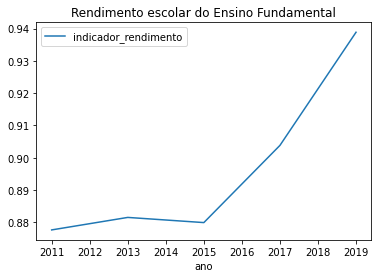

In [9]:
#gráfico do Indicador de Rendimento escolar

ideb_rio.plot(x='ano', y='indicador_rendimento', title="Rendimento escolar do Ensino Fundamental")

<AxesSubplot:title={'center':'Nota SAEB do Ensino Fundamental'}, xlabel='ano'>

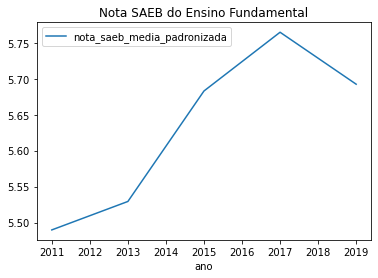

In [10]:
#gráfico da Nota SAEB

ideb_rio.plot(x='ano', y='nota_saeb_media_padronizada', title="Nota SAEB do Ensino Fundamental")

<AxesSubplot:title={'center':'Ideb do Ensino Fundamental'}, xlabel='ano'>

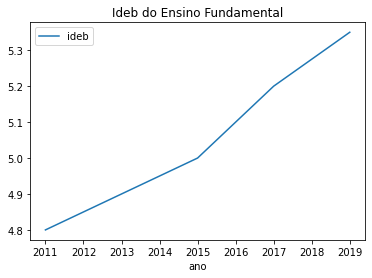

In [11]:
#gráfico do Ideb

ideb_rio.plot(x='ano', y='ideb', title="Ideb do Ensino Fundamental")

**Para analisar se o crescimento do Ideb carioca está bom a nível estadual, irei analisar os aumentos percentuais dos Idebs dos municípios do estado Rio de Janeiro**

In [12]:
#monto uma tabela com os Idebs dos municipios do Rio para o ensino fundamental na rede publica

ideb_rio_es=ideb[(ideb['sigla_uf']=='RJ') & (ideb['ensino']=='fundamental') & (ideb['rede']=='publica')]

colunas2=['ano', 'id_municipio', 'anos_escolares', 'ideb']

ideb_rio_es=ideb_rio_es[colunas2]

ideb_rio_es=ideb_rio_es.dropna(axis=0)

ideb_rio_es

,ano,id_municipio,anos_escolares,ideb
18483,2005,3300100,finais (6-9),3.2
18484,2005,3300100,iniciais (1-5),3.6
18489,2005,3300159,finais (6-9),3.4
18490,2005,3300159,iniciais (1-5),5.2
18495,2005,3300209,finais (6-9),3.6
...,...,...,...,...
240220,2019,3306156,iniciais (1-5),5.3
240227,2019,3306206,finais (6-9),4.2
240228,2019,3306206,iniciais (1-5),5.2
240236,2019,3306305,finais (6-9),5.0


In [13]:
#agrupo os anos escolares pela média

ideb_rio_es=ideb_rio_es.groupby(['id_municipio', 'ano'], as_index=False).mean()

ideb_rio_es

,id_municipio,ano,ideb
0,3300100,2005,3.40
1,3300100,2007,3.70
2,3300100,2009,3.65
3,3300100,2011,4.35
4,3300100,2013,4.25
...,...,...,...
729,3306305,2011,4.70
730,3306305,2013,5.00
731,3306305,2015,5.05
732,3306305,2017,5.35


In [14]:
#pego os idebs do ano de 2011 e 2019, e monto uma tabela para cada municipio com a diferença entre os idebs

colunas3={'id_municipio':[], 'diff_liq':[], 'diff_prc':[]}
diff_ideb=pd.DataFrame(data=colunas3)

ideb_rio_2011=ideb_rio_es[ideb_rio_es['ano']==2011]

ideb_rio_2019=ideb_rio_es[ideb_rio_es['ano']==2019]

for id in ideb_rio_2011.index:
    for id2 in ideb_rio_2019.index:
        if ideb_rio_2011['id_municipio'][id] == ideb_rio_2019['id_municipio'][id2]:
            diff1=ideb_rio_2019['ideb'][id2]-ideb_rio_2011['ideb'][id]
            diff2=diff1/ideb_rio_2011['ideb'][id]
            new_row={'id_municipio':ideb_rio_2011['id_municipio'][id], 'diff_liq':diff1, 'diff_prc':diff2}
            diff_ideb=diff_ideb.append(new_row, ignore_index=True)

diff_ideb=diff_ideb.sort_values(by=['diff_prc'], ascending=False)

diff_ideb=diff_ideb.reset_index()

diff_ideb=diff_ideb.drop(['index'], 1)

print("A média do aumento percentual do Ideb dos municípios do Rio de Janeiro é", diff_ideb['diff_prc'].mean())

diff_ideb

A média do aumento percentual do Ideb dos municípios do Rio de Janeiro é 0.14940463833386278


,id_municipio,diff_liq,diff_prc
0,3300225.0,1.85,0.445783
1,3301876.0,1.60,0.400000
2,3302502.0,1.35,0.380282
3,3302270.0,0.95,0.292308
4,3303005.0,1.40,0.291667
...,...,...,...
87,3304706.0,0.05,0.008929
88,3304805.0,0.00,0.000000
89,3305307.0,-0.05,-0.010526
90,3300902.0,-0.40,-0.072072


In [15]:
#busco o munícipio do Rio na tabela e imprimo os resultados

for id in diff_ideb.index:
    if diff_ideb['id_municipio'][id]==3304557:
        print("O aumento líquido entre o Ideb carioca de 2019 para 2011 é", diff_ideb['diff_liq'][id])
        print("O aumento percentual entre o Ideb carioca de 2019 para 2011 é", diff_ideb['diff_prc'][id])
        print("O município do Rio está na {}ª posição dos maiores aumentos percentuais do estado do Rio de Janeiro".format(id+1))

O aumento líquido entre o Ideb carioca de 2019 para 2011 é 0.5499999999999989
O aumento percentual entre o Ideb carioca de 2019 para 2011 é 0.11458333333333309
O município do Rio está na 60ª posição dos maiores aumentos percentuais do estado do Rio de Janeiro
